# Classification avec K-means de données générées¶

In [1]:
import numpy as np
from numpy import newaxis
d1 = np.random.randn(100, 3) + [3, 3, 3]
d2 = np.random.randn(100, 3) + [-3, -3, -3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]
c1 = np.ones(100)      # génération des étiquettes du groupe 1
c2 = 2 * np.ones(100)  # génération des étiquettes du groupe 2
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)
data1 = np.hstack((d1,c1[:,newaxis]))  # ajout des étiquettes comme 4ème colonne
data2 = np.hstack((d2,c2[:,newaxis]))
data3 = np.hstack((d3,c3[:,newaxis]))
data4 = np.hstack((d4,c4[:,newaxis]))
data5 = np.hstack((d5,c5[:,newaxis]))
data = np.concatenate((data1,data2,data3,data4,data5))  # concaténation des données dans une matrice
print(data.shape)
np.random.shuffle(data)   

(500, 4)


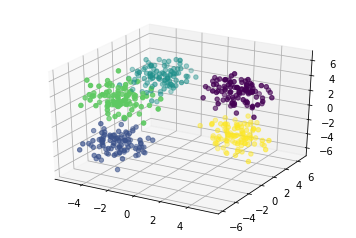

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c = data[:, 3])
plt.show()

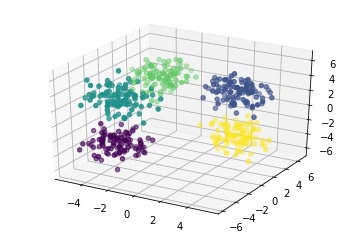

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init = 10, init = 'k-means++')
kmeans.fit(data[:, :3])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c = kmeans.labels_)
plt.show()

In [4]:
# Il est possible d’évaluer la cohérence entre les groupes de départ 
# et le partitionnement trouvé par K-means en utilisant l’indice de Rand ajusté
from sklearn import metrics
metrics.adjusted_rand_score(kmeans.labels_, data[:,3])

0.98994485251505959

In [5]:
kmeans = KMeans(n_clusters=5, n_init=10, init='random').fit(data[:,:3])
metrics.adjusted_rand_score(kmeans.labels_, data[:,3])

0.98994485251505959

## Questions
    Répétez plusieurs fois la classification avec chacune de ces deux méthodes
    d’initialisation et examinez à chaque fois la cohérence des groupes obtenus 
    avec les groupes de départ. Que constatez-vous ? Expliquez.

Bounded range [-1, 1]: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.

L'indice de Rand varie entre différents lancements. Cela dépend des centres mobiles choisis 
à l'initialisation.

    Si on emploie le paramètre par défaut n_init = 10 plutôt que n_init = 1, 
    la variance des résultats diminue significativement, y compris pour 
    l’initialisation init='random'.
On obtient à chaque fois un indice de Rand égale à 1, indiquant une classification parfaite 
    
    Question :
    Variez le nombre de groupes (n_clusters) et faites plusieurs essais pour 
    chaque valeur du nombre de groupes. Examinez de nouveau l’indice de Rand 
    ajusté. Expliquez ce que vous constatez.
On constate qu'un maximum est obtenu pour k = 5. 

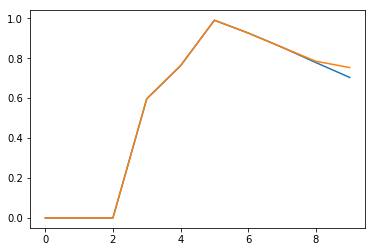

In [6]:
y = np.zeros((10))
z = np.zeros((10))
for k in range(3, 10):
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++').fit(data[:,:3])
    y[k] = metrics.adjusted_rand_score(kmeans.labels_, data[:,3])
    kmeans = KMeans(n_clusters = k, n_init=10, init='random').fit(data[:,:3])
    z[k] = metrics.adjusted_rand_score(kmeans.labels_, data[:,3])
    
fig = plt.figure()
x = range(0, 10)
plt.plot(x, y)
plt.plot(x, z)
plt.show()

## Question 
    Variez le nombre de groupes (n_clusters) entre 2 et 20, tracez le graphique 
    d’évolution de la valeur finale atteinte par le coût pour chacune des valeurs 
    de n_clusters.

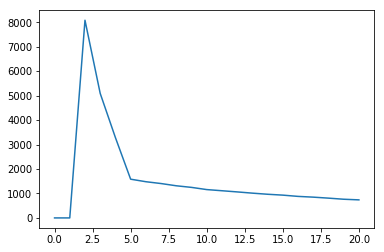

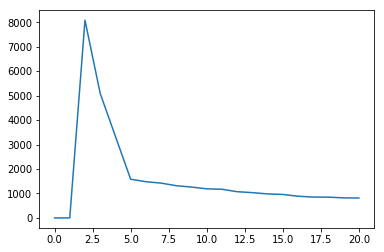

In [7]:
max_k = 21
y = np.zeros((max_k))
z = np.zeros((max_k))
for k in range(2, max_k):
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++').fit(data[:,:3])
    y[k] = kmeans.inertia_
    kmeans = KMeans(n_clusters = k, n_init = 10, init='random').fit(data[:,:3])
    z[k] = kmeans.inertia_
    
x = range(0, max_k)
fig = plt.figure()
plt.plot(x, y)
plt.show()
fig = plt.figure()
plt.plot(x, z)
plt.show()

## Question - compte-rendu

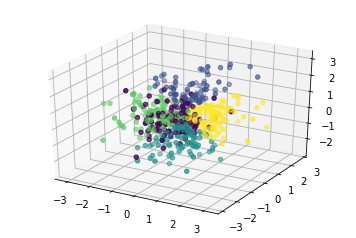

MEAN =  0.75698765393
STD =  0.16254940531


In [8]:
def stability(z):
    max_k = len(z)
    r = [] 
    for i in range(0, max_k):
        for j in range(i + 1, max_k - 1):
            r.append(metrics.adjusted_rand_score(z[i].labels_, z[j].labels_))
    return np.asarray(r)
# Générez 500 données suivant une distribution uniforme dans [0,1). 
# d = np.random.uniform(0, 1, (500, 3))
# Générez 500 données suivant une distribution normale. 
d = np.random.randn(500, 3)

kmeans = KMeans(n_clusters = 5, n_init = 10, init = 'random')
kmeans.fit(d[:, :3])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(d[:, 0], d[:, 1], d[:, 2], c = kmeans.labels_)
plt.show()

# Appliquez sur ces données K-means avec n_clusters=5 et initialisation aléatoire (random), 
# et examinez la stabilité des résultats en utilisant l’indice de Rand. 
max_k = 40
z = []
for k in range(0, max_k):
    z.append(KMeans(n_clusters = 5, n_init = 10, init='random').fit(d[:,:3]))

r = stability(z)
    
from scipy import stats
print("MEAN = ", r.mean())
print("STD = ", r.std())


In [33]:
# Appliquez sur ces mêmes données K-means avec toujours n_clusters=5 
# mais initialisation k-means++, examinez la stabilité des résultats. 
z = []
for k in range(0, max_k):
    z.append(KMeans(n_clusters = 5, n_init = 10, init='k-means++').fit(d[:,:3]))

r = stability(z)

print("MEAN = ", r.mean())
print("STD = ", r.std())

MEAN =  0.73547691986
STD =  0.136989731019


    Pour définir une classification de référence, à laquelle 
    vous comparerez les autres, vous pouvez appliquer une première 
    fois K-means avec n_clusters=5, n_init=1, init='k-means++'. 

    Observez-vous des différences par rapport aux résultats obtenus sur 
    les données générées avec np.random.randn ? Expliquez.
On observe une forte variabilité sur l'indice de Rand.
Cela est dû au fait d'une absence de groupes dans le jeu de données.
Le premier jeu de données, généré à partir de 5 échantillons issues d'une distribution normale,
contient lui 5 groupes, permettant une bonne stabilité de l'indice de Rand.  

# Classification avec K-means des données « textures »

In [25]:
#texture = np.genfromtxt('texture.dat', usecols=range(41), delimiter=' ', filling_values=0.0)
#print(texture)
#print(texture.shape)
#print("LCLS = {}".format(lcls))
#print(lcls.shape)
# lcls = lcls = np.genfromtxt('texture.dat', dtype=int, usecols=(41), delimiter=' ', filling_values=0.0)

texture = np.loadtxt('texture.dat')
np.random.shuffle(texture)
kmeans = KMeans(n_clusters=11).fit(texture[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, texture[:,40])

0.46198856078637229

## Question  - Compte-rendu
    Appliquez l’analyse discriminante à ces données 
    et appliquez de nouveau K-means avec n_clusters = 11 
    aux données projetées dans l’espace discriminant. 
    Que constatez-vous ? Expliquez. 
    Visualisez les résultats.
    
On observe de très bons résultats (passant de 0.1 à 0.8 à 0.95 (soit une classification quasi-parfaite))
Grâce à l'analyse discriminante, nous avons trouvé les facteurs séparant au mieux les données,
simplifiant les variables et permettant d'avoir des données plus sphériques, 
comme on peut le voir sur le graph3D.
Cela aide K-Means à mieux trouver les groupes et donc, obtient un meilleur indice de Rand

/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


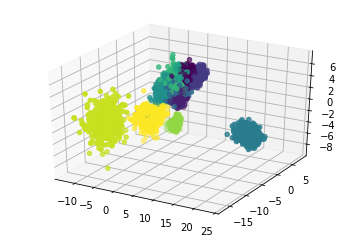

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
tlda = lda.fit_transform(texture[:,:40],texture[:,40])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tlda[:, 0], tlda[:, 1], tlda[:, 2], c = texture[:,40])
plt.show()

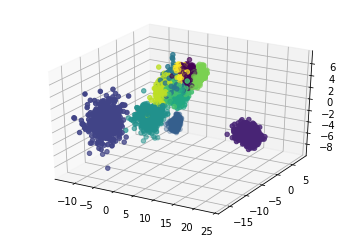

0.99007579314959171

In [56]:
kmeans = KMeans(n_clusters=11).fit(tlda)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(tlda[:, 0], tlda[:, 1], tlda[:, 2], c = kmeans.labels_)
plt.show()

metrics.adjusted_rand_score(kmeans.labels_, texture[:,40])